In [1]:
# Import necessary libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt

d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## (A) getData function:
This function generates a dataset based on the given distribution.
It generates random values for X in the range (0, 1) and calculates corresponding Y values using the given formula.

In [2]:
# Function to generate the dataset
def getData(variance, N):
    X = np.random.uniform(0, 1, N)  # Generate N random numbers between 0 and 1
    Z = np.random.normal(0, variance, N)  # Generate N random numbers from a normal distribution with mean 0 and variance σ^2
    Y = np.cos(2 * math.pi * X) + Z  # Calculate Y using the given formula
    return np.vstack((X, Y)).T  # Return the dataset as a NumPy array

## (B) getMSE function:
This calculates the Mean Squared Error (MSE) given the predicted y_pred and the actual y.

In [3]:
# Function to calculate the mean squared error
def getMSE(y_pred, y):
    mse = np.mean((y - y_pred) ** 2)  # Calculate mean squared error
    return mse

## (C) GD, SGD, and Mini_batch functions:
These functions perform gradient descent (GD), stochastic gradient descent (SGD), mini-batch gradient descent, and mini-batch gradient descent without regularization, respectively. They update the model weights using the gradients and return the final weights and the mean squared error (Ein) for the training dataset.

In [4]:
# Gradient Descent (GD) optimization method
def GD(X, y, n, weights):
    itr = 2000  # Number of iterations for gradient descent
    lrate = 0.001  # Learning rate
    Ein_list = np.zeros(itr)  # Array to store Ein for each iteration
    Ein = 0

    # Gradient Descent iteration
    for i in range(itr):
        # Update weights using the gradient descent update rule
        weights -= lrate * (2 / n) * (((X.dot(weights) - y).T).dot(X).T)
        # Calculate Ein and store it in the list
        Ein_list[i] = getMSE(X.dot(weights), y)

    Ein = Ein_list[itr - 1]  # Ein after the final iteration
    return weights, Ein


# Stochastic Gradient Descent (SGD) optimization method
def SGD(X, Y, n, weights):
    itr = 2000  # Number of iterations for stochastic gradient descent
    lrate = 0.001  # Learning rate
    Ein_list = np.zeros(itr)  # Array to store Ein for each iteration
    Ein = 0

    # Stochastic Gradient Descent iteration
    for i in range(itr):
        random_index = random.randint(0, n - 1)  # Choose a random data point
        x = X[random_index].reshape(-1, 1)
        y = Y[random_index].reshape(-1, 1)
        # Update weights using the stochastic gradient descent update rule
        weights -= lrate * (2 / n) * (((x * weights - y)) * x)
        # Calculate Ein and store it in the list
        Ein_list[i] = getMSE(X.dot(weights), Y)

    Ein = Ein_list[itr - 1]  # Ein after the final iteration
    return weights, Ein

# Mini-batch Gradient Descent optimization method
def Mini_batch(X, Y, n, weights):
    itr = 2000  # Number of iterations for mini-batch gradient descent
    lrate = 0.001  # Learning rate
    batch_size = 50  # Batch size
    Ein_list = np.zeros(itr)  # Array to store Ein for each iteration
    Ein = 0

    # Mini-batch Gradient Descent iteration
    for i in range(itr):
        if batch_size >= n:
            x = X
            y = Y
            batch_size = n
        else:
            random_index = random.randint(0, n - batch_size)  # Choose a random starting index
            x = X[random_index:random_index + batch_size]
            y = Y[random_index:random_index + batch_size]
        
        # Update weights using the mini-batch gradient descent update rule
        weights -= lrate * (2 / batch_size) * ((x.dot(weights) - y).T.dot(x).T)
        # Calculate Ein and store it in the list
        Ein_list[i] = getMSE(X.dot(weights), Y)

    Ein = Ein_list[itr - 1]  # Ein after the final iteration
    return weights, Ein

## (D) fitData function:
This function fits the given data to a polynomial of degree d. It prepares the feature matrix X with polynomial features and initializes weights. It then calls the appropriate optimization function (GD, SGD, Mini_batch) based on the setter argument to fit the data and return the final weights and Ein.

In [5]:
# Function to fit the data to a polynomial using the specified optimization method
def fitData(data, d, setter):
    y = data[:, 1].reshape((len(data), 1))
    x = data[:, 0]
    X = np.ones((1, len(data)))

    # Generate the feature matrix with polynomial features
    for i in range(d):
        X = np.vstack((X, x ** (i + 1)))
    X = X.T

    # Initialize weights randomly
    weights = np.random.random([d + 1, 1])
    n = len(data)  # Number of data points

    # Choose the optimization method based on the setter value
    if setter == 1:
        weights, Ein = GD(X, y, n, weights)
    elif setter == 2:
        weights, Ein = SGD(X, y, n, weights)
    else:
        weights, Ein = Mini_batch(X, y, n, weights)

    return weights, Ein

In [6]:
# Function to test the model using a separate testing dataset and calculate Eout
def testing(tdata, weights, d):
    n = len(tdata)
    y = tdata[:, 1].reshape((n, 1))
    x = tdata[:, 0]
    X = np.ones((1, n))

    # Generate the feature matrix with polynomial features
    for i in range(d):
        X = np.vstack((X, x ** (i + 1)))
    X = X.T

    # Calculate Eout (mean squared error on the testing dataset)
    Eout = getMSE(X.dot(weights), y)
    return Eout

## (E) experiment function:
This function runs the experiment by generating datasets with noise, fitting them to polynomials of a specified degree, and calculating Ein, Eout, and Ebias. It averages these values over multiple trials.

In [7]:
# Function to run experiments for different dataset sizes, noise levels, and model degrees
def experiment(N, variance, d, setter):
    m = 50  # Number of trials for each experiment
    Ein_list = []
    Eout_list = []
    weight_list = []

    # Run the experiment for 'm' trials
    for i in range(m):
        # Generate a training dataset
        tempdata = getData(variance, N)
        # Fit the training data to a polynomial of degree 'd'
        temp_weight, temp_Ein = fitData(tempdata, d, setter)
        # Generate a separate testing dataset
        temp_test_data = getData(variance, 1000)
        # Calculate Eout for the testing dataset
        temp_Eout = testing(temp_test_data, temp_weight, d)

        # Append Ein, Eout, and weights for this trial
        Ein_list.append(temp_Ein)
        Eout_list.append(temp_Eout)
        weight_list.append(temp_weight)

    # Calculate average Ein, Eout, and weights over all trials
    Ein_avg = np.mean(Ein_list)
    Eout_avg = np.mean(Eout_list)
    weights_avg = np.mean(weight_list, axis=0)

    # Calculate Ebias using a larger dataset
    tempdata = getData(variance, 2000)
    Ebias = testing(tempdata, weights_avg, d)
    Egen = abs(Ein_avg - Eout_avg)  # Calculate generalization error
    return Ein_avg, Eout_avg, Ebias, Egen

## Results and Plots:

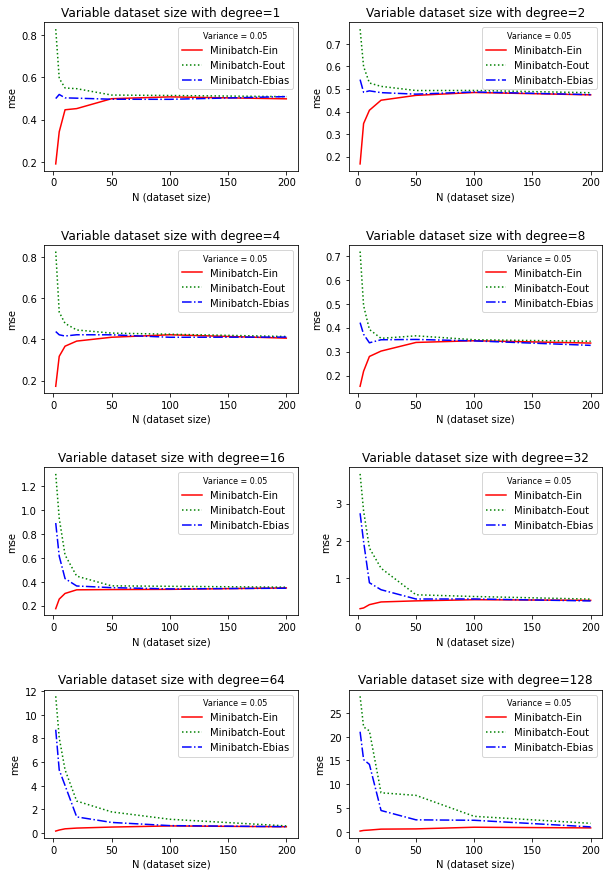

In [8]:
# Plots for σ=0.05
N = [2, 5, 10, 20, 50, 100, 200]
Deg = [1, 2, 4, 8, 16, 32, 64, 128]

# Create subplots for the plots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Loop over different polynomial degrees
for i, D in enumerate(Deg):
    Mini_list = [[], [], []]  # List to store Ein, Eout, and Ebias

    # Loop over different dataset sizes
    for j, n in enumerate(N):
        # Run the experiment and obtain Ein, Eout, and Ebias
        Ein, Eout, Ebias, _ = experiment(n, 0.05, D, 3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)

    # Determine subplot row and column
    row = i // 2
    col = i % 2

    # Plot Ein, Eout, and Ebias for this polynomial degree
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Minibatch-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Minibatch-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Minibatch-Ebias')
    
    # Add the variance string to the legend
    axes[row, col].legend(title='Variance', loc='best')
    axes[row, col].get_legend().get_title().set_fontsize('8')
    axes[row, col].get_legend().set_title('Variance = 0.05')
    
    title = f'Variable dataset size with degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')

plt.show()

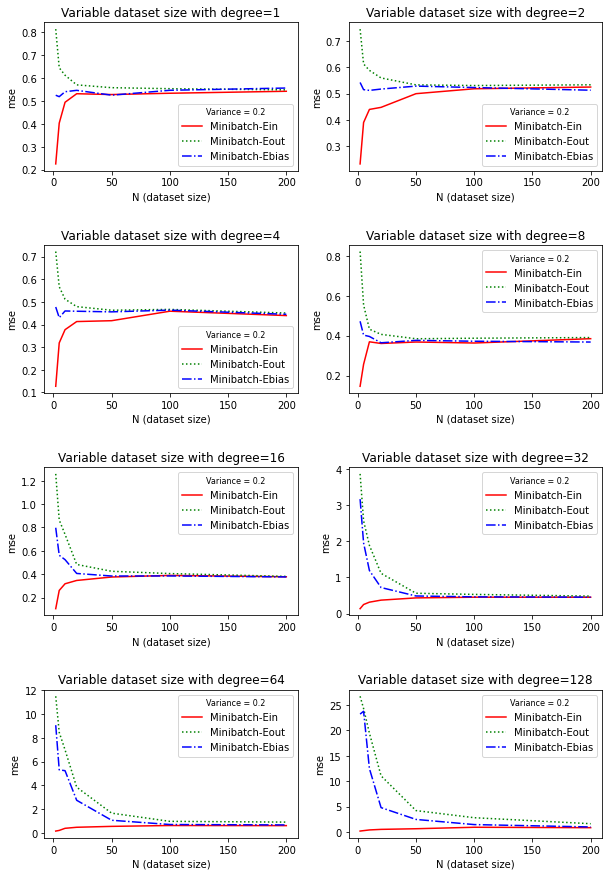

In [9]:
# Plots for σ=0.2
N = [2, 5, 10, 20, 50, 100, 200]
Deg = [1, 2, 4, 8, 16, 32, 64, 128]

# Create subplots for the plots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Loop over different polynomial degrees
for i, D in enumerate(Deg):
    Mini_list = [[], [], []]  # List to store Ein, Eout, and Ebias

    # Loop over different dataset sizes
    for j, n in enumerate(N):
        # Run the experiment and obtain Ein, Eout, and Ebias
        Ein, Eout, Ebias, _ = experiment(n, 0.2, D, 3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)

    # Determine subplot row and column
    row = i // 2
    col = i % 2

    # Plot Ein, Eout, and Ebias for this polynomial degree
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Minibatch-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Minibatch-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Minibatch-Ebias')
    
    # Add the variance string to the legend
    axes[row, col].legend(title='Variance', loc='best')
    axes[row, col].get_legend().get_title().set_fontsize('8')
    axes[row, col].get_legend().set_title('Variance = 0.2')
    
    title = f'Variable dataset size with degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')

plt.show()


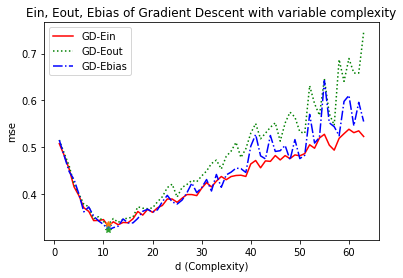

In [10]:
#variable complexity on mse for Gradient Descent 
Mini_list = [[], [], []]
for d in range(1,64):
    t1,t2,t3,t4 = experiment(200,0.1,d,1)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)

d = [x for x in range(1,64)]

plt.plot(d,Mini_list[0],color='r',linestyle='solid',label='GD-Ein')
plt.plot(d,Mini_list[1],color='g',linestyle='dotted',label='GD-Eout')
plt.plot(d,Mini_list[2],color='b',linestyle='dashdot',label='GD-Ebias')

plt.plot(d[Mini_list[0].index(min(Mini_list[0]))],min(Mini_list[0]),'*')
plt.plot(d[Mini_list[1].index(min(Mini_list[1]))],min(Mini_list[1]),'*')
plt.plot(d[Mini_list[2].index(min(Mini_list[2]))],min(Mini_list[2]),'*')


plt.title('Ein, Eout, Ebias of Gradient Descent with variable complexity')
plt.xlabel('d (Complexity)')
plt.ylabel('mse')
plt.legend()
plt.show()

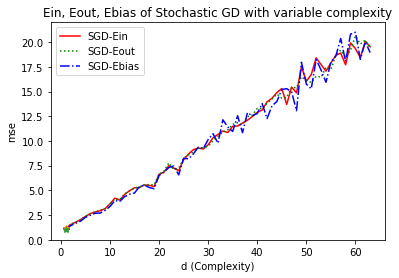

In [11]:
#variable complexity on mse for SGD
Mini_list = [[], [], []]
for d in range(1,64):
    t1,t2,t3,t4 = experiment(200,0.1,d,2)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)

d = [x for x in range(1,64)]

plt.plot(d,Mini_list[0],color='r',linestyle='solid',label='SGD-Ein')
plt.plot(d,Mini_list[1],color='g',linestyle='dotted',label='SGD-Eout')
plt.plot(d,Mini_list[2],color='b',linestyle='dashdot',label='SGD-Ebias')

plt.plot(d[Mini_list[0].index(min(Mini_list[0]))],min(Mini_list[0]),'*')
plt.plot(d[Mini_list[1].index(min(Mini_list[1]))],min(Mini_list[1]),'*')
plt.plot(d[Mini_list[2].index(min(Mini_list[2]))],min(Mini_list[2]),'*')


plt.title('Ein, Eout, Ebias of Stochastic GD with variable complexity')
plt.xlabel('d (Complexity)')
plt.ylabel('mse')
plt.legend()
plt.show()

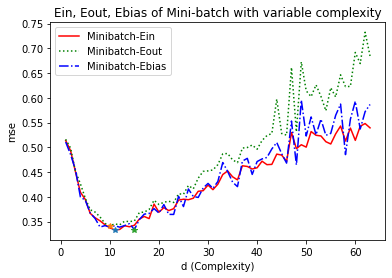

In [12]:
#variable complexity on mse for Mini batch
Mini_list = [[], [], []]
for d in range(1,64):
    t1,t2,t3,t4 = experiment(200,0.1,d,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)

d = [x for x in range(1,64)]

plt.plot(d,Mini_list[0],color='r',linestyle='solid',label='Minibatch-Ein')
plt.plot(d,Mini_list[1],color='g',linestyle='dotted',label='Minibatch-Eout')
plt.plot(d,Mini_list[2],color='b',linestyle='dashdot',label='Minibatch-Ebias')

plt.plot(d[Mini_list[0].index(min(Mini_list[0]))],min(Mini_list[0]),'*')
plt.plot(d[Mini_list[1].index(min(Mini_list[1]))],min(Mini_list[1]),'*')
plt.plot(d[Mini_list[2].index(min(Mini_list[2]))],min(Mini_list[2]),'*')


plt.title('Ein, Eout, Ebias of Mini-batch with variable complexity')
plt.xlabel('d (Complexity)')
plt.ylabel('mse')
plt.legend()
plt.show()

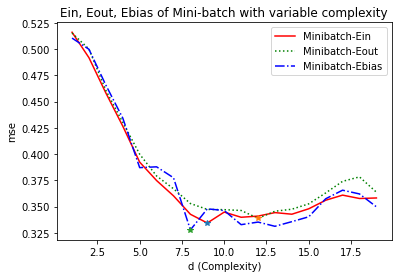

In [18]:
#variable complexity on mse for Mini batch
Mini_list = [[], [], []]
for d in range(1,20):
    t1,t2,t3,t4 = experiment(200,0.1,d,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)

d = [x for x in range(1,20)]

plt.plot(d,Mini_list[0],color='r',linestyle='solid',label='Minibatch-Ein')
plt.plot(d,Mini_list[1],color='g',linestyle='dotted',label='Minibatch-Eout')
plt.plot(d,Mini_list[2],color='b',linestyle='dashdot',label='Minibatch-Ebias')

plt.plot(d[Mini_list[0].index(min(Mini_list[0]))],min(Mini_list[0]),'*')
plt.plot(d[Mini_list[1].index(min(Mini_list[1]))],min(Mini_list[1]),'*')
plt.plot(d[Mini_list[2].index(min(Mini_list[2]))],min(Mini_list[2]),'*')


plt.title('Ein, Eout, Ebias of Mini-batch with variable complexity')
plt.xlabel('d (Complexity)')
plt.ylabel('mse')
plt.legend()
plt.show()

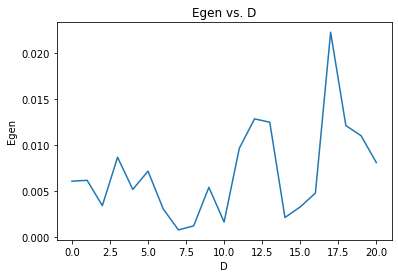

In [19]:
# generalization error vs model complexity
N = 200
res=[]
D = [_ for _ in range(21)]
for d in D:
    Ein_avg, Eout_avg, Ebias, Egen = experiment(n,0.2,d,3)
    res.append(Egen)
plt.plot(D,res)
plt.xlabel('D') 
plt.ylabel('Egen')
plt.title('Egen vs. D')
plt.show()
    

In [20]:
import pickle
with open('res.pkl','wb') as file:
    pickle.dump(res,file)

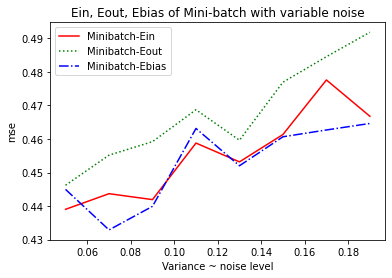

In [16]:
# Effect of variance on error
Variance_list = np.arange(0.05,0.2,0.02)
Mini_list = [[], [], []]

for variance_iteration in Variance_list:
    t1,t2,t3,t4 = experiment(100,variance_iteration,3,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)
    
plt.plot(Variance_list,Mini_list[0],color='r',linestyle='solid',label='Minibatch-Ein')
plt.plot(Variance_list,Mini_list[1],color='g',linestyle='dotted',label='Minibatch-Eout')
plt.plot(Variance_list,Mini_list[2],color='b',linestyle='dashdot',label='Minibatch-Ebias')

plt.title('Ein, Eout, Ebias of Mini-batch with variable noise')
plt.xlabel('Variance ~ noise level')
plt.ylabel('mse')
plt.legend()
plt.show()

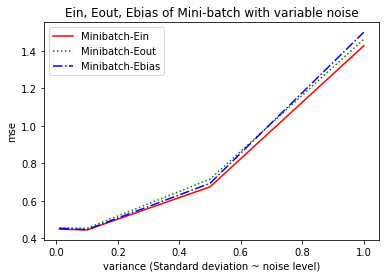

In [17]:
#Variable Noise level
Variance_list = [0.01,0.1,0.5,1]
Mini_list = [[], [], []]
for variance_iteration in Variance_list:
    t1,t2,t3,t4 = experiment(100,variance_iteration,3,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)
    
plt.plot(Variance_list,Mini_list[0],color='r',linestyle='solid',label='Minibatch-Ein')
plt.plot(Variance_list,Mini_list[1],color='g',linestyle='dotted',label='Minibatch-Eout')
plt.plot(Variance_list,Mini_list[2],color='b',linestyle='dashdot',label='Minibatch-Ebias')

plt.title('Ein, Eout, Ebias of Mini-batch with variable noise')
plt.xlabel('variance (Standard deviation ~ noise level)')
plt.ylabel('mse')
plt.legend()
plt.show()